In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipywidgets.embed import embed_minimal_html as export
from matplotlib import rcParams




In [2]:
#Pull in CSV
Vic_Employment_data = pd.read_csv("../output_data/clean_filter/vic_emp.csv")
QLD_Employment_data = pd.read_csv("../output_data/clean_filter/qld_emp.csv")
WA_Employment_data = pd.read_csv("../output_data/clean_filter/WA_emp.csv")



In [3]:
#Cut Index to 2016-2020

Vic_data_cut = Vic_Employment_data.iloc[294:353]  
QLD_data_cut = QLD_Employment_data.iloc[294:353]  
WA_data_cut = WA_Employment_data.iloc[294:353]  
Vic_data_cut.head()


,Unnamed: 0,Date,Month,Year,> Victoria ; Unemployment rate ; Persons ;,> Victoria ; Unemployment rate ; > Males ;,> Victoria ; Unemployment rate ; > Females ;
294,294,Jan-16,Jan,2016,6.9,6.7,7.2
295,295,Feb-16,Feb,2016,6.2,6.0,6.4
296,296,Mar-16,Mar,2016,6.0,5.6,6.5
297,297,Apr-16,Apr,2016,5.7,5.1,6.4
298,298,May-16,May,2016,5.7,5.1,6.4


In [4]:
#Select Male/Female Data
Vic_T = Vic_data_cut["> Victoria ;  Unemployment rate ;  Persons ;"]

Vic_M = Vic_data_cut["> Victoria ;  Unemployment rate ;  > Males ;"]

Vic_F = Vic_data_cut["> Victoria ;  Unemployment rate ;  > Females ;"]

WA_T = WA_data_cut["> Western Australia ;  Unemployment rate ;  Persons ;"]

WA_M = WA_data_cut["> Western Australia ;  Unemployment rate ;  > Males ;"]

WA_F = WA_data_cut["> Western Australia ;  Unemployment rate ;  > Females ;"]

QLD_T = QLD_data_cut["> Queensland ;  Unemployment rate ;  Persons ;"]

QLD_M = QLD_data_cut["> Queensland ;  Unemployment rate ;  > Males ;"]

QLD_F = QLD_data_cut["> Queensland ;  Unemployment rate ;  > Females ;"]

In [5]:
#Create Function for setting x and plotting
#x = length of date column
#3 Graphs for each state comparing unemployment over time for male and female line.
Time = Vic_data_cut["Date"]
def make_line(t,m,f,ylab,title):
    fig = plt.figure(figsize= (8,6))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    plt.plot(Time,m, '-b',label = 'Male',alpha = 0.5)
    plt.plot(Time,f,'-r',label='Female',alpha = 0.4)
    plt.plot(Time,t,'-g',label='Total Persons',alpha = 0.3)

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylab)

    s,p = stats.ttest_ind(m,f)
    covid_line = plt.axvline(x=49,color = 'k',linestyle='--',alpha = 0.3)
    covid_line.set_label('PHE')
    ax.legend(loc='upper left',fancybox=True, framealpha=0.5)
    
    plt.text(0.2, 0.05, f"p_value = {round(p,5)}", horizontalalignment='center',verticalalignment='top', transform=ax.transAxes)

    ax.set_xticks([1,7,13,19,25,31,37,43,49,55,61])
    ax.set_xticklabels(['Jan-16','July-16','Jan-17','July-17','Jan-18','July-18','Jan-19','July-19','Jan-20','July-20'])
    plt.xticks(rotation=20)



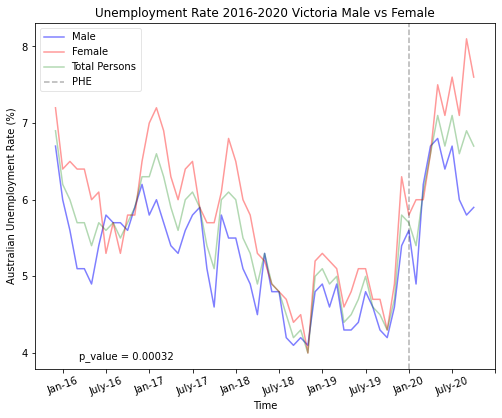

In [6]:
make_line(Vic_T,Vic_M,Vic_F,"Australian Unemployment Rate (%)","Unemployment Rate 2016-2020 Victoria Male vs Female")
plt.savefig('../Graph_Outputs/Vic_Gender.png')
plt.show()

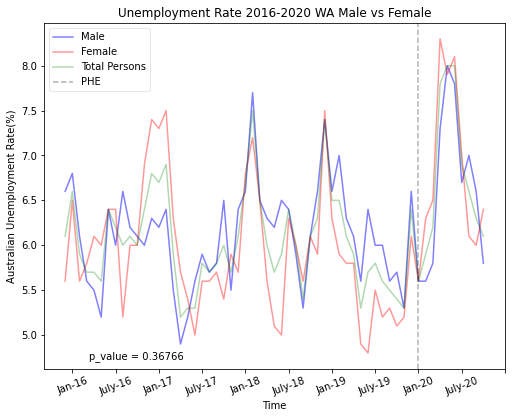

In [7]:
make_line(WA_T,WA_M,WA_F,"Australian Unemployment Rate(%)","Unemployment Rate 2016-2020 WA Male vs Female")
plt.savefig('../Graph_Outputs/WA_Gender.png')
plt.show()

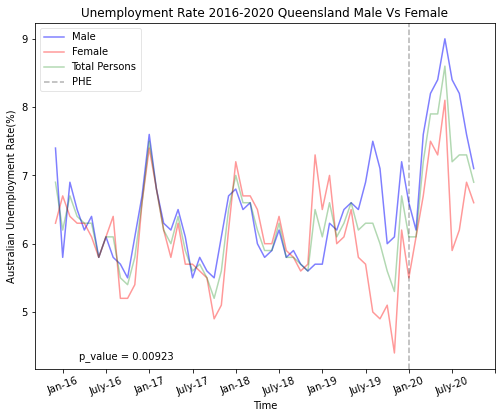

In [8]:
make_line(QLD_T,QLD_M,QLD_F,"Australian Unemployment Rate(%)","Unemployment Rate 2016-2020 Queensland Male Vs Female")
plt.savefig("../Graph_Outputs/QLD_Gender.png")
plt.show()